## Random Sampling Imputation
Aim: random sample imputation consist of taking random observation from dataset and we usedthiseto replacethan nan values

when should we used ?
it assume that data are missing that completely at random

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
# Percentage Of Null Values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [6]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    #Random Sample to Fill Nan
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pandas need to Have Same index in order to merge datasets
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [7]:
median=df.Age.median()

In [8]:
median

28.0

In [9]:
impute_nan(df,"Age",median)

In [10]:
df.head()

Survived   Age     Fare  Age_median  Age_random
0         0  22.0   7.2500        22.0        22.0
1         1  38.0  71.2833        38.0        38.0
2         1  26.0   7.9250        26.0        26.0
3         1  35.0  53.1000        35.0        35.0
4         0  35.0   8.0500        35.0        35.0

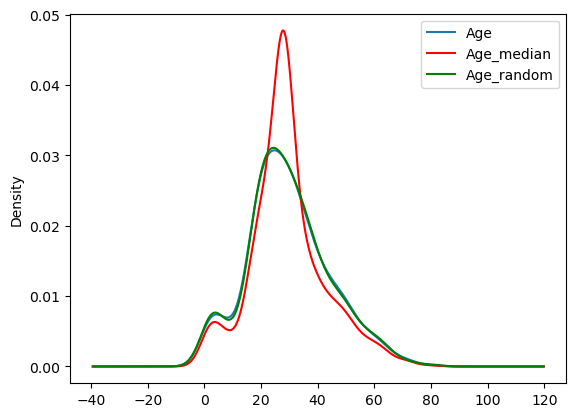

In [12]:
fig =plt.figure()
ax =fig.add_subplot(111)
df["Age"].plot(kind ="kde",ax=ax)
df.Age_median.plot(kind="kde",ax=ax,color="red")
df.Age_random.plot(kind="kde",ax=ax,color="green")
lines,labels =ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

##### Advantages
1. Easy to implement
2. there is less distortion in variance

##### Diadvantages
1. every situation randomness wont work

##### Capturing NAN Values with a new feature
its works well if data are not missing completely at Nan

In [14]:
df =pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [16]:
import numpy as np 
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)

In [17]:
df.head()

Survived   Age     Fare  Age_NAN
0         0  22.0   7.2500        0
1         1  38.0  71.2833        0
2         1  26.0   7.9250        0
3         1  35.0  53.1000        0
4         0  35.0   8.0500        0

In [18]:
df.Age.median()

28.0

In [20]:
df["Age"].fillna(df.Age.median(),inplace=True)

In [23]:
df.head(10)

Survived   Age     Fare  Age_NAN
0         0  22.0   7.2500        0
1         1  38.0  71.2833        0
2         1  26.0   7.9250        0
3         1  35.0  53.1000        0
4         0  35.0   8.0500        0
5         0  28.0   8.4583        1
6         0  54.0  51.8625        0
7         0   2.0  21.0750        0
8         1  27.0  11.1333        0
9         1  14.0  30.0708        0

###### Advantages
1. Easy to implements
2. Capture the importance of missing values
###### Disaadvantages
1. Creating additional features(curse of dimenesionality)

##### End of distrubution

In [24]:
df =pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

<AxesSubplot:>

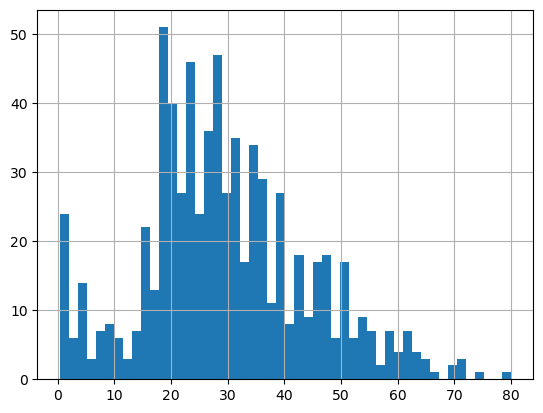

In [25]:
df.Age.hist(bins=50)

In [28]:
df.Age.mean()+3*df.Age.std()

73.27860964406095

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

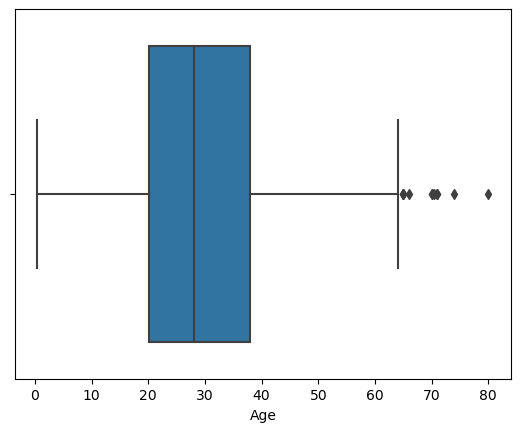

In [29]:
import seaborn as sns
sns.boxplot("Age",data=df)

In [94]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [98]:
impute_nan(df,'Age',df.Age.median(),extreme=10)

In [99]:
df.head()

Survived   Age     Fare  Age_end_distribution
0         0  22.0   7.2500                  22.0
1         1  38.0  71.2833                  38.0
2         1  26.0   7.9250                  26.0
3         1  35.0  53.1000                  35.0
4         0  35.0   8.0500                  35.0

<AxesSubplot:>

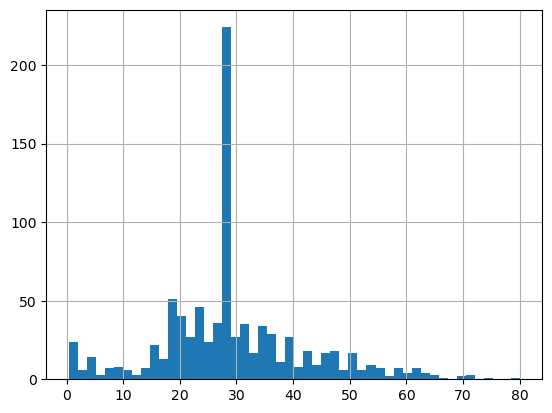

In [100]:
df["Age"].hist(bins=50)

C:\Users\BHUSHAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

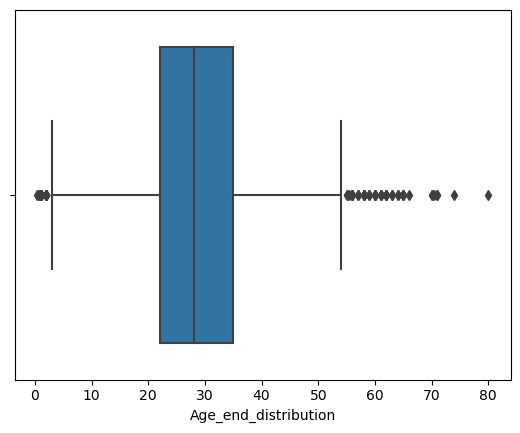

In [101]:
sns.boxplot("Age_end_distribution",data=df)